
# Magnetism and Bar Magnets

### Overview of Magnetism
Magnetism is a fundamental physical phenomenon that arises from the motion of electric charges, primarily electrons in atoms. It is an intrinsic property of materials like iron, cobalt, and nickel, which are known as ferromagnetic materials. The magnetic behavior of these materials is due to the alignment of their atomic magnetic moments, which are small magnetic fields generated by the motion of electrons.

Magnetic fields are vector fields that exert forces on other magnetic objects and charged particles. The strength and direction of the magnetic field at any point in space are described by the magnetic field vector **B**.

### Bar Magnets
A bar magnet is a simple and commonly used magnet consisting of a rectangular piece of ferromagnetic material with a permanent magnetic field. The magnet has two poles, conventionally labeled as the north (N) and south (S) poles. The magnetic field lines emerge from the north pole and curve around to enter the south pole, forming a closed loop.

### Mathematical Description of Magnetic Fields

#### Magnetic Dipole
The magnetic field **B** generated by a small magnetic dipole moment **m** at a position **r** relative to the dipole can be described mathematically by the following equation in Cartesian coordinates:

\begin{equation}
\mathbf{B}(\mathbf{r}) = \frac{\mu_0}{4\pi} \left[ \frac{3(\mathbf{m} \cdot \hat{\mathbf{r}})\hat{\mathbf{r}} - \mathbf{m}}{r^3} \right]
\end{equation}

Here:
- $\mu_0$ is the permeability of free space ($\mu_0 = 4\pi \times 10^{-7} \, \text{T}\cdot\text{m/A}$).
- $\mathbf{m}$ is the magnetic dipole moment vector.
- $\mathbf{r}$ is the position vector from the dipole to the point where the field is being calculated.
- $\hat{\mathbf{r}}$ is the unit vector in the direction of $\mathbf{r}$.
- $r = |\mathbf{r}|$ is the distance from the dipole.

This equation expresses the magnetic field at a point due to a single magnetic dipole. The field is strongest near the dipole and decreases with the cube of the distance from the dipole.

#### Superposition Principle
When multiple magnetic dipoles are present, such as in a bar magnet composed of aligned atomic dipoles, the total magnetic field at any point is the vector sum of the fields produced by each dipole. For a collection of dipoles positioned within a bar magnet, the total field **B_total** at a point is given by:

\begin{equation}
\mathbf{B}_{\text{total}}(\mathbf{r}) = \sum_{i} \mathbf{B}_i(\mathbf{r} - \mathbf{r}_i)
\end{equation}

Where $\mathbf{B}_i(\mathbf{r} - \mathbf{r}_i)$ is the field due to the $i$-th dipole located at position $\mathbf{r}_i$.

### Interaction of Bar Magnets
When two bar magnets are placed near each other, their magnetic fields interact according to the superposition principle. The resulting field is a complex pattern that depends on the relative positions, orientations, and strengths of the magnets. If the magnets are aligned with opposite poles facing each other, they attract; if like poles face each other, they repel.

### Visualization of Magnetic Fields
The magnetic field generated by bar magnets can be visualized using field lines, which represent the direction of the magnetic field. The density of these lines indicates the strength of the field. In the simulation, we visualize these fields using streamlines and contour plots, which provide an intuitive understanding of the field’s structure and behavior.

#### Simulation of Moving Bar Magnets
In the simulation, we model one bar magnet as stationary while another magnet moves horizontally across it. The magnetic fields of both magnets are calculated using the equations described above. As the moving magnet changes position, the total magnetic field is recalculated, demonstrating the dynamic interaction between the two fields.

This theoretical framework forms the basis of the simulation, allowing us to study and visualize the behavior of magnetic fields in a controlled environment.


In [229]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 5
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5   
plt.rcParams['ytick.major.size'] = 5   
plt.rcParams['xtick.major.width'] = 1   
plt.rcParams['ytick.major.width'] = 1   
plt.rcParams['legend.fontsize'] = 14

## Magnetic Field of Dipols

In [252]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import matplotlib.colors as mcolors

def magnetic_field_strength(x, y, pole_position, pole_strength, threshold=1e-9):
    """
    Calculate the magnetic field strength at a given point (x, y).
    More realistic model assuming a dipole field instead of a monopole.
    """
    x_pole, y_pole = pole_position
    distance = np.sqrt((x - x_pole) ** 2 + (y - y_pole) ** 2)
    distance = np.where(distance < threshold, threshold, distance)
    field_strength = pole_strength / (distance ** 3)
    return field_strength

def magnetic_field_vector(x, y, pole_position, pole_strength, threshold=1e-9):
    """
    Calculate the magnetic field vector at a given point (x, y).
    """
    x_pole, y_pole = pole_position
    distance = np.sqrt((x - x_pole) ** 2 + (y - y_pole) ** 2)
    distance = np.where(distance < threshold, threshold, distance)
    strength = magnetic_field_strength(x, y, pole_position, pole_strength, threshold)
    Bx = strength * (x - x_pole) / distance
    By = strength * (y - y_pole) / distance
    return np.array([Bx, By])

def plot_magnetic_field(pole_distance, dipole_distance):
    """
    Plot the magnetic field for the given pole and dipole distances.
    """
    # Magnet 1
    north_pole_position = (pole_distance / 2, dipole_distance / 2)
    south_pole_position = (-pole_distance / 2, dipole_distance / 2)
    
    # Magnet 2
    north_pole_position_2 = (-pole_distance / 2, -dipole_distance / 2)
    south_pole_position_2 = (pole_distance / 2, -dipole_distance / 2)
    
    pole_strength = 1

    # Create a grid of points to calculate the magnetic field
    x_values = np.linspace(-5, 5, 200)
    y_values = np.linspace(-5, 5, 200)
    X, Y = np.meshgrid(x_values, y_values)

    # Calculate the magnetic field vectors for Magnet 1
    Bx_north, By_north = magnetic_field_vector(X, Y, north_pole_position, pole_strength)
    Bx_south, By_south = magnetic_field_vector(X, Y, south_pole_position, -pole_strength)

    # Superpose the fields from both poles of Magnet 1
    Bx = Bx_north + Bx_south
    By = By_north + By_south

    # Calculate the magnetic field vectors for Magnet 2
    Bx_north_2, By_north_2 = magnetic_field_vector(X, Y, north_pole_position_2, pole_strength)
    Bx_south_2, By_south_2 = magnetic_field_vector(X, Y, south_pole_position_2, -pole_strength)

    # Superpose the fields from both magnets
    Bx_total = Bx + Bx_north_2 + Bx_south_2
    By_total = By + By_north_2 + By_south_2

    # Calculate the magnitude (for coloring) but don't normalize
    magnitude = np.sqrt(Bx_total**2 + By_total**2)

    # Normalize the vectors for direction
    Bx_total_normalized = Bx_total / magnitude
    By_total_normalized = By_total / magnitude

    # Define color normalization based on magnitude range
    norm = mcolors.Normalize(vmin=magnitude.min(), vmax=magnitude.max())

    # Plot the combined magnetic field lines with varying colors
    plt.figure(figsize=(10, 10))
    plt.streamplot(X, Y, Bx_total_normalized, By_total_normalized, color=magnitude, linewidth=1, cmap='cool', norm=norm)
    plt.scatter([north_pole_position[0], south_pole_position[0], north_pole_position_2[0], south_pole_position_2[0]], 
                [north_pole_position[1], south_pole_position[1], north_pole_position_2[1], south_pole_position_2[1]], 
                color=['red', 'blue', 'red', 'blue'], s=100, label='Magnetic Poles')
    plt.colorbar(label='Magnetic Field Strength')
    plt.clim(0.7,0.9)
    plt.title('Magnetic Field Interaction Between Dipols in 2D')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

# Create interactive sliders for the pole distance and dipole distance
interact(plot_magnetic_field,
         pole_distance=FloatSlider(min=0.5, max=10, step=0.1, value=2, description='Pole Distance'),
         dipole_distance=FloatSlider(min=0.5, max=10, step=0.1, value=3, description='Dipole Distance'));


interactive(children=(FloatSlider(value=2.0, description='Pole Distance', max=10.0, min=0.5), FloatSlider(valu…

In [250]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_magnetic_field(pole_distance, dipole_distance):
    """
    Plot the magnetic field in 3D for the given pole and dipole distances.
    """
    # Magnet 1
    north_pole_position = (pole_distance / 2, dipole_distance / 2, 0)
    south_pole_position = (-pole_distance / 2, dipole_distance / 2, 0)
    
    # Magnet 2
    north_pole_position_2 = (-pole_distance / 2, -dipole_distance / 2, 0)
    south_pole_position_2 = (pole_distance / 2, -dipole_distance / 2, 0)
    
    pole_strength = 1

    # Create a grid of points to calculate the magnetic field
    x_values = np.linspace(-5, 5, 30)
    y_values = np.linspace(-5, 5, 30)
    z_values = np.linspace(-5, 5, 30)
    X, Y, Z = np.meshgrid(x_values, y_values, z_values)

    # Calculate the magnetic field vectors for Magnet 1
    Bx_north, By_north = magnetic_field_vector(X, Y, north_pole_position[:2], pole_strength)
    Bx_south, By_south = magnetic_field_vector(X, Y, south_pole_position[:2], -pole_strength)

    # Superpose the fields from both poles of Magnet 1
    Bx = Bx_north + Bx_south
    By = By_north + By_south

    # Calculate the magnetic field vectors for Magnet 2
    Bx_north_2, By_north_2 = magnetic_field_vector(X, Y, north_pole_position_2[:2], pole_strength)
    Bx_south_2, By_south_2 = magnetic_field_vector(X, Y, south_pole_position_2[:2], -pole_strength)

    # Superpose the fields from both magnets
    Bx_total = Bx + Bx_north_2 + Bx_south_2
    By_total = By + By_north_2 + By_south_2

    # Normalize the vectors for direction
    magnitude = np.sqrt(Bx_total**2 + By_total**2)
    Bx_total_normalized = Bx_total / magnitude
    By_total_normalized = By_total / magnitude

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the field vectors
    ax.quiver(X, Y, Z, Bx_total_normalized, By_total_normalized, np.zeros_like(Bx_total_normalized), length=0.1, color='blue')
    
    # Plot the poles
    ax.scatter([north_pole_position[0], south_pole_position[0], north_pole_position_2[0], south_pole_position_2[0]], 
               [north_pole_position[1], south_pole_position[1], north_pole_position_2[1], south_pole_position_2[1]], 
               [north_pole_position[2], south_pole_position[2], north_pole_position_2[2], south_pole_position_2[2]], 
               color=['red', 'blue', 'red', 'blue'], s=100, label='Magnetic Poles')
    
    ax.set_title('3D Magnetic Field Interaction Between Dipols in 3D')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.show()

# Create interactive sliders for the pole distance and dipole distance
interact(plot_3d_magnetic_field,
         pole_distance=FloatSlider(min=0.5, max=10, step=0.1, value=2, description='Pole Distance'),
         dipole_distance=FloatSlider(min=0.5, max=10, step=0.1, value=3, description='Dipole Distance'));


interactive(children=(FloatSlider(value=2.0, description='Pole Distance', max=10.0, min=0.5), FloatSlider(valu…

## Magnetic Field of a Bar Magnet

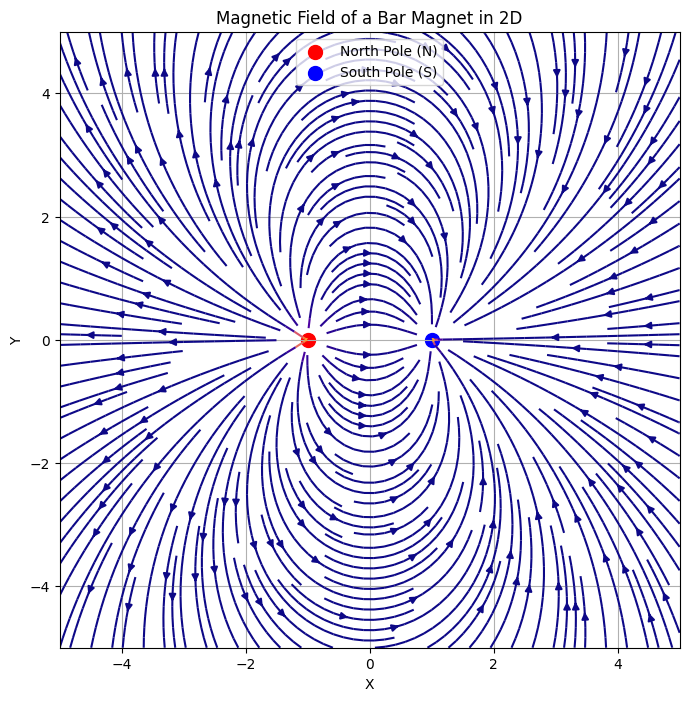

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Define the positions of the poles (North and South)
north_pole = np.array([-1, 0])  # Position of the North pole
south_pole = np.array([1, 0])   # Position of the South pole

# Magnetic charge strength (analogous to electric charge)
q_m = 1.0

# Define the grid for field calculation
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Position vectors relative to each pole
R_north = np.sqrt((X - north_pole[0])**2 + (Y - north_pole[1])**2)
R_south = np.sqrt((X - south_pole[0])**2 + (Y - south_pole[1])**2)

# Avoid division by zero at the location of the poles
R_north[R_north == 0] = np.inf
R_south[R_south == 0] = np.inf

# Calculate the magnetic field components
Bx_north = q_m * (X - north_pole[0]) / R_north**3
By_north = q_m * (Y - north_pole[1]) / R_north**3

Bx_south = -q_m * (X - south_pole[0]) / R_south**3
By_south = -q_m * (Y - south_pole[1]) / R_south**3

# Total magnetic field
Bx = Bx_north + Bx_south
By = By_north + By_south

# Plotting the magnetic field
plt.figure(figsize=(8, 8))
plt.streamplot(X, Y, Bx, By, color=np.sqrt(Bx**2 + By**2), cmap='plasma', density=2)

# Marking the North and South poles
plt.scatter(north_pole[0], north_pole[1], color='red', s=100, label="North Pole (N)")
plt.scatter(south_pole[0], south_pole[1], color='blue', s=100, label="South Pole (S)")

plt.title("Magnetic Field of a Bar Magnet in 2D")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


In [185]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Constants
MU_0 = 4 * np.pi * 1e-7  # Permeability of free space

def calculate_dipole_field(X, Y, dipole_pos, dipole_moment):
    """
    Calculate the magnetic field at points (X, Y) due to a single dipole.
    """
    x0, y0 = dipole_pos
    mx, my = dipole_moment

    # Calculate position vectors from dipole to each point in the grid
    Rx = X - x0
    Ry = Y - y0
    R = np.sqrt(Rx**2 + Ry**2)
    
    # Avoid division by zero at the location of the dipole
    R[R == 0] = np.inf
    
    # Calculate the magnetic field components
    Bx = MU_0 / (4 * np.pi) * (3 * (mx * Rx + my * Ry) * Rx / R**5 - mx / R**3)
    By = MU_0 / (4 * np.pi) * (3 * (mx * Rx + my * Ry) * Ry / R**5 - my / R**3)
    
    return Bx, By

def calculate_total_field(X, Y, dipole_grid, dipole_moment):
    """
    Calculate the total magnetic field at points (X, Y) due to a grid of dipoles.
    """
    X_dipoles, Y_dipoles = dipole_grid
    Bx_total = np.zeros_like(X)
    By_total = np.zeros_like(Y)
    
    # Sum the contributions of each dipole
    for i in range(X_dipoles.size):
        dipole_pos = (X_dipoles.flat[i], Y_dipoles.flat[i])
        Bx, By = calculate_dipole_field(X, Y, dipole_pos, dipole_moment)
        Bx_total += Bx
        By_total += By
    
    return Bx_total, By_total

def plot_magnetic_field(length, width):
    """
    Plot the magnetic field and the bar magnet for given length and width.
    """
    # Magnet properties
    dipole_magnitude = 1.0  # Magnitude of each dipole moment
    dipole_moment = (dipole_magnitude, 0)  # Dipole moment along the x-axis

    # Number of dipoles in the grid (discretization)
    num_dipoles_length = 20
    num_dipoles_width = 10

    # Define the grid for field calculation
    x = np.linspace(-3, 3, 200)
    y = np.linspace(-2, 2, 200)
    X, Y = np.meshgrid(x, y)

    # Create a grid of dipoles within the rectangular magnet
    x_dipoles = np.linspace(-length/2, length/2, num_dipoles_length)
    y_dipoles = np.linspace(-width/2, width/2, num_dipoles_width)
    X_dipoles, Y_dipoles = np.meshgrid(x_dipoles, y_dipoles)

    # Calculate the total magnetic field
    Bx_total, By_total = calculate_total_field(X, Y, (X_dipoles, Y_dipoles), dipole_moment)

    # Plot the magnetic field
    plt.figure(figsize=(10, 8))
    plt.streamplot(X, Y, Bx_total, By_total, color=np.sqrt(Bx_total**2 + By_total**2), cmap='plasma', density=2)
    
    # Draw the rectangle representing the bar magnet with color gradient
    rect_red = plt.Rectangle((-length/2, -width/2), length/2, width, linewidth=2, edgecolor='black',
                             facecolor='#069AF3', alpha=1, zorder=2)
    rect_blue = plt.Rectangle((0, -width/2), length/2, width, linewidth=2, edgecolor='black',
                              facecolor='#EF4026', alpha=1, zorder=2)
    plt.gca().add_patch(rect_red)
    plt.gca().add_patch(rect_blue)
    
    # Enhancing the plot
    plt.title(f"Magnetic Field of a Bar Magnet (Length={length}, Width={width})", fontsize=16)
    plt.xlabel("X", fontsize=14)
    plt.ylabel("Y", fontsize=14)
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Create interactive sliders
interact(plot_magnetic_field, 
         length=FloatSlider(value=2.0, min=0.5, max=5.0, step=0.1, description='Length'),
         width=FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='Width'));


interactive(children=(FloatSlider(value=2.0, description='Length', max=5.0, min=0.5), FloatSlider(value=1.0, d…

## Magetic Field of Two Bar Magnets

In [259]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, Button, HBox, VBox, Output
from IPython.display import display

# Constants
MU_0 = 4 * np.pi * 1e-7  # Permeability of free space

# Global variables for flipping magnets
flip1 = 1
flip2 = 1

# Initial positions and values
initial_length1 = 2.0
initial_width1 = 1.0
initial_length2 = 2.0
initial_width2 = 1.0
initial_x_pos1 = 0.0
initial_y_pos1 = 1.5
initial_x_pos2 = 0.0
initial_y_pos2 = -1.5

# Output widget for plot
output = Output()

def calculate_dipole_field(X, Y, dipole_pos, dipole_moment):
    x0, y0 = dipole_pos
    mx, my = dipole_moment

    Rx = X - x0
    Ry = Y - y0
    R = np.sqrt(Rx**2 + Ry**2)
    
    # Avoid division by zero at the location of the dipole
    R[R == 0] = np.inf
    
    Bx = MU_0 / (4 * np.pi) * (3 * (mx * Rx + my * Ry) * Rx / R**5 - mx / R**3)
    By = MU_0 / (4 * np.pi) * (3 * (mx * Rx + my * Ry) * Ry / R**5 - my / R**3)
    
    return Bx, By

def calculate_total_field(X, Y, dipole_grid, dipole_moment, uniform_magnitude):
    X_dipoles, Y_dipoles = dipole_grid
    Bx_total = np.zeros_like(X)
    By_total = np.zeros_like(Y)
    
    for i in range(X_dipoles.size):
        dipole_pos = (X_dipoles.flat[i], Y_dipoles.flat[i])
        Bx, By = calculate_dipole_field(X, Y, dipole_pos, dipole_moment)
        Bx_total += Bx
        By_total += By
    
    # Set uniform field inside the magnets
    inside_magnet = (X >= X_dipoles.min()) & (X <= X_dipoles.max()) & (Y >= Y_dipoles.min()) & (Y <= Y_dipoles.max())
    Bx_total[inside_magnet] = uniform_magnitude * dipole_moment[0]
    By_total[inside_magnet] = uniform_magnitude * dipole_moment[1]
    
    return Bx_total, By_total

def plot_magnetic_field(length1, width1, length2, width2, x_pos1, y_pos1, x_pos2, y_pos2):
    global flip1, flip2

    dipole_magnitude = 1.0
    uniform_magnitude = 0.5  # Uniform field magnitude inside the magnets
    dipole_moment1 = (dipole_magnitude * flip1, 0)
    dipole_moment2 = (dipole_magnitude * flip2, 0)
    
    num_dipoles_length = 20
    num_dipoles_width = 10

    # Set grid size to 5x5
    grid_size = 5.0
    x_max = grid_size 
    y_max = grid_size 

    x = np.linspace(-x_max, x_max, 300)
    y = np.linspace(-y_max, y_max, 300)
    X, Y = np.meshgrid(x, y)

    # Adjust the position of the first magnet
    x_dipoles1 = np.linspace(-length1/2, length1/2, num_dipoles_length) + x_pos1
    y_dipoles1 = np.linspace(-width1/2, width1/2, num_dipoles_width) + y_pos1
    X_dipoles1, Y_dipoles1 = np.meshgrid(x_dipoles1, y_dipoles1)

    # Adjust the position of the second magnet
    x_dipoles2 = np.linspace(-length2/2, length2/2, num_dipoles_length) + x_pos2
    y_dipoles2 = np.linspace(-width2/2, width2/2, num_dipoles_width) + y_pos2
    X_dipoles2, Y_dipoles2 = np.meshgrid(x_dipoles2, y_dipoles2)

    Bx1, By1 = calculate_total_field(X, Y, (X_dipoles1, Y_dipoles1), dipole_moment1, uniform_magnitude)
    Bx2, By2 = calculate_total_field(X, Y, (X_dipoles2, Y_dipoles2), dipole_moment2, uniform_magnitude)

    Bx_total = Bx1 + Bx2
    By_total = By1 + By2

    with output:
        output.clear_output(wait=True)  # Clear previous output
        plt.figure(figsize=(8, 8))  # Set the figure size
        plt.streamplot(X, Y, Bx_total, By_total, color=np.sqrt(Bx_total**2 + By_total**2), cmap='plasma', density=2)

        # Adjust the rectangle patches based on the flipping state
        if flip1 == 1:
            rect_red1 = plt.Rectangle((-length1/2 + x_pos1, -width1/2 + y_pos1), length1/2, width1, linewidth=2, edgecolor='black',
                                      facecolor='#069AF3', alpha=1, zorder=2)
            rect_blue1 = plt.Rectangle((x_pos1, -width1/2 + y_pos1), length1/2, width1, linewidth=2, edgecolor='black',
                                       facecolor='#EF4026', alpha=1, zorder=2)
        else:
            rect_red1 = plt.Rectangle((x_pos1, -width1/2 + y_pos1), length1/2, width1, linewidth=2, edgecolor='black',
                                      facecolor='#069AF3', alpha=1, zorder=2)
            rect_blue1 = plt.Rectangle((-length1/2 + x_pos1, -width1/2 + y_pos1), length1/2, width1, linewidth=2, edgecolor='black',
                                       facecolor='#EF4026', alpha=1, zorder=2)
        
        if flip2 == 1:
            rect_red2 = plt.Rectangle((-length2/2 + x_pos2, -width2/2 + y_pos2), length2/2, width2, linewidth=2, edgecolor='black',
                                      facecolor='#069AF3', alpha=1, zorder=2)
            rect_blue2 = plt.Rectangle((x_pos2, -width2/2 + y_pos2), length2/2, width2, linewidth=2, edgecolor='black',
                                       facecolor='#EF4026', alpha=1, zorder=2)
        else:
            rect_red2 = plt.Rectangle((x_pos2, -width2/2 + y_pos2), length2/2, width2, linewidth=2, edgecolor='black',
                                      facecolor='#069AF3', alpha=1, zorder=2)
            rect_blue2 = plt.Rectangle((-length2/2 + x_pos2, -width2/2 + y_pos2), length2/2, width2, linewidth=2, edgecolor='black',
                                       facecolor='#EF4026', alpha=1, zorder=2)

        plt.gca().add_patch(rect_red1)
        plt.gca().add_patch(rect_blue1)
        plt.gca().add_patch(rect_red2)
        plt.gca().add_patch(rect_blue2)

        plt.title(f"Magnetic Field of Two Bar Magnets", fontsize=16)
        plt.xlabel("X", fontsize=14)
        plt.ylabel("Y", fontsize=14)
        plt.xlim(-5, 5)
        plt.ylim(-5, 5)
        plt.grid(True)
        plt.axis('equal')
        plt.show()

def update_plot(*args):
    plot_magnetic_field(slider_length1.value, slider_width1.value, slider_length2.value, slider_width2.value, 
                        slider_x_pos1.value, slider_y_pos1.value, 
                        slider_x_pos2.value, slider_y_pos2.value)

def flip_magnet1(_):
    global flip1
    flip1 *= -1
    update_plot()

def flip_magnet2(_):
    global flip2
    flip2 *= -1
    update_plot()

def reset_settings(_):
    global flip1, flip2
    flip1 = 1
    flip2 = 1
    slider_length1.value = initial_length1
    slider_width1.value = initial_width1
    slider_length2.value = initial_length2
    slider_width2.value = initial_width2
    slider_x_pos1.value = initial_x_pos1
    slider_y_pos1.value = initial_y_pos1
    slider_x_pos2.value = initial_x_pos2
    slider_y_pos2.value = initial_y_pos2

# Create flip buttons
button1 = Button(description="Flip Magnet 1")
button1.on_click(flip_magnet1)

button2 = Button(description="Flip Magnet 2")
button2.on_click(flip_magnet2)

# Create reset button
reset_button = Button(description="Reset")
reset_button.on_click(reset_settings)

# Create interactive sliders for both magnets
slider_length1 = FloatSlider(value=initial_length1, min=1, max=3.0, step=0.1, description='Length1')
slider_width1 = FloatSlider(value=initial_width1, min=0.5, max=1.0, step=0.1, description='Width1')
slider_length2 = FloatSlider(value=initial_length2, min=1, max=3.0, step=0.1, description='Length2')
slider_width2 = FloatSlider(value=initial_width2, min=0.5, max=1.0, step=0.1, description='Width2')

# Create sliders for x and y positions of each magnet
slider_x_pos1 = FloatSlider(value=initial_x_pos1, min=-2.0, max=2.0, step=0.1, description='X Pos 1')
slider_y_pos1 = FloatSlider(value=initial_y_pos1, min=-2.0, max=2.0, step=0.1, description='Y Pos 1')
slider_x_pos2 = FloatSlider(value=initial_x_pos2, min=-2.0, max=2.0, step=0.1, description='X Pos 2')
slider_y_pos2 = FloatSlider(value=initial_y_pos2, min=-2.0, max=2.0, step=0.1, description='Y Pos 2')

# Link sliders to update_plot function
slider_length1.observe(update_plot, names='value')
slider_width1.observe(update_plot, names='value')
slider_length2.observe(update_plot, names='value')
slider_width2.observe(update_plot, names='value')
slider_x_pos1.observe(update_plot, names='value')
slider_y_pos1.observe(update_plot, names='value')
slider_x_pos2.observe(update_plot, names='value')
slider_y_pos2.observe(update_plot, names='value')

# Display the buttons and interactive sliders
display(VBox([HBox([button1, button2, reset_button]), slider_length1, slider_width1, slider_length2, slider_width2, 
              slider_x_pos1, slider_y_pos1, slider_x_pos2, slider_y_pos2, output]))

# Initial plot
plot_magnetic_field(slider_length1.value, slider_width1.value, slider_length2.value, slider_width2.value, 
                    slider_x_pos1.value, slider_y_pos1.value, 
                    slider_x_pos2.value, slider_y_pos2.value)


## Magnetic Field Animation of Two Bar Magnets

/var/folders/hb/cgmm688j7q51h1ygk7wzt9fh0000gn/T/ipykernel_10936/3470659693.py:95: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  return contourf.collections + [stream.lines]
/var/folders/hb/cgmm688j7q51h1ygk7wzt9fh0000gn/T/ipykernel_10936/3470659693.py:95: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  return contourf.collections + [stream.lines]


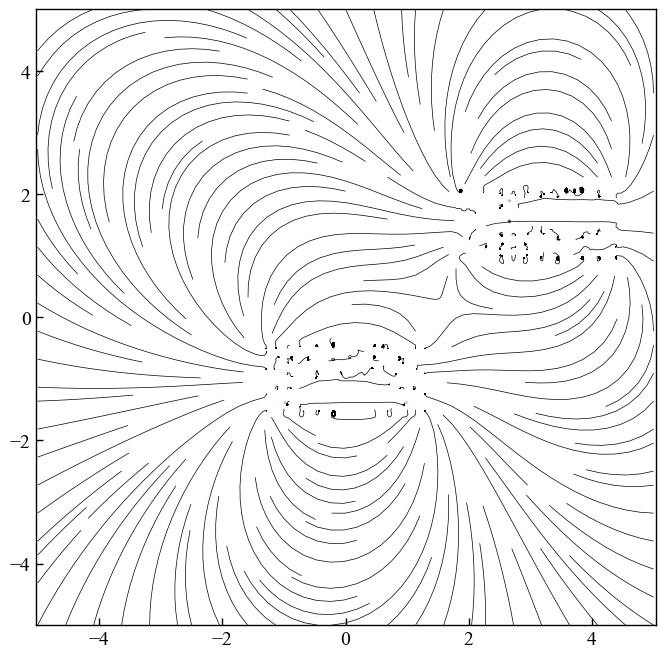

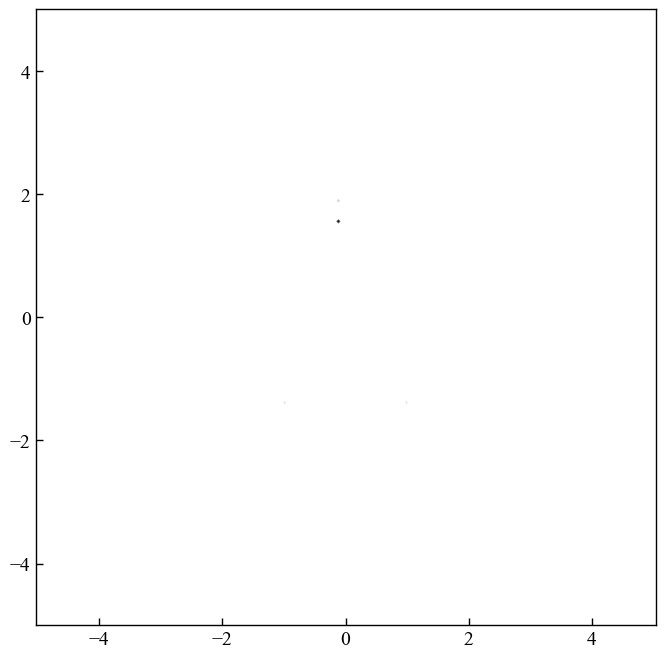

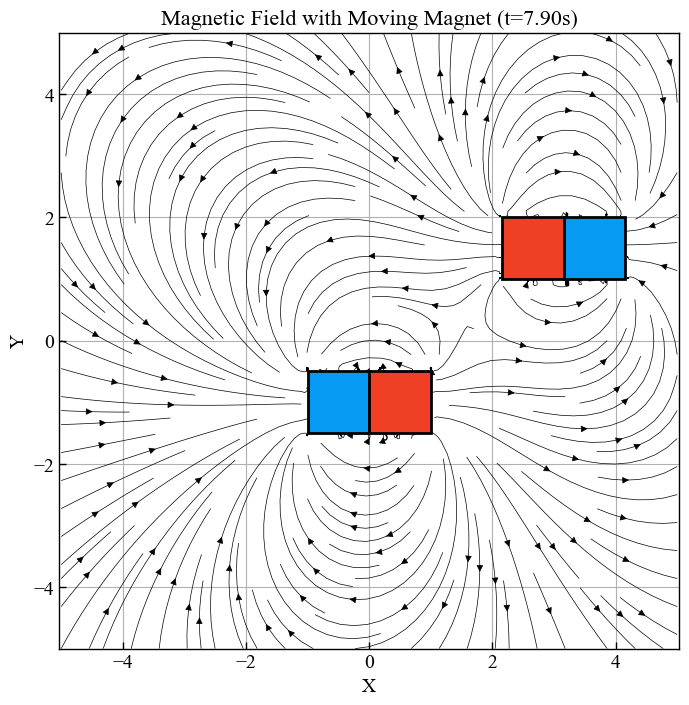

In [290]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Constants
MU_0 = 4 * np.pi * 1e-7  # Permeability of free space

def calculate_dipole_field(X, Y, dipole_pos, dipole_moment):
    """
    Calculate the magnetic field at points (X, Y) due to a single dipole.
    """
    x0, y0 = dipole_pos
    mx, my = dipole_moment

    # Calculate position vectors from dipole to each point in the grid
    Rx = X - x0
    Ry = Y - y0
    R = np.sqrt(Rx**2 + Ry**2)
    
    # Avoid division by zero at the location of the dipole
    R[R == 0] = np.inf
    
    # Calculate the magnetic field components
    Bx = MU_0 / (4 * np.pi) * (3 * (mx * Rx + my * Ry) * Rx / R**5 - mx / R**3)
    By = MU_0 / (4 * np.pi) * (3 * (mx * Rx + my * Ry) * Ry / R**5 - my / R**3)
    
    return Bx, By

def calculate_total_field(X, Y, dipole_grid, dipole_moment):
    """
    Calculate the total magnetic field at points (X, Y) due to a grid of dipoles.
    """
    X_dipoles, Y_dipoles = np.array(dipole_grid[0]), np.array(dipole_grid[1])
    Bx_total = np.zeros_like(X)
    By_total = np.zeros_like(Y)
    
    # Sum the contributions of each dipole
    for i in range(X_dipoles.size):
        dipole_pos = (X_dipoles.flat[i], Y_dipoles.flat[i])
        Bx, By = calculate_dipole_field(X, Y, dipole_pos, dipole_moment)
        Bx_total += Bx
        By_total += By
    
    return Bx_total, By_total

def create_animation(X, Y, X_dipoles_fixed, Y_dipoles_fixed, X_dipoles_moving, Y_dipoles_moving, Bx_static, By_static, v_dipole, dipole_moment, dt, total_time):
    """
    Create an animation of the magnetic field with a moving dipole over a fixed bar magnet.
    """
    fig, ax = plt.subplots(figsize=(8, 8))

    def update(frame):
        t = frame * dt
        
        # Update the positions of the moving dipoles
        X_dipoles_moving_updated = X_dipoles_moving + v_dipole * t
        Bx_dynamic, By_dynamic = calculate_total_field(X, Y, (X_dipoles_moving_updated, Y_dipoles_moving), dipole_moment)

        # Total field is the sum of static and dynamic fields
        Bx_total = Bx_static + Bx_dynamic
        By_total = By_static + By_dynamic

        # Clear the current plot
        ax.clear()

        # Plot the combined magnetic field
        contourf = ax.contourf(X, Y, np.sqrt(Bx_total**2 + By_total**2), cmap='binary', levels=100, extend='both')
        stream = ax.streamplot(X, Y, Bx_total, By_total, color='k', linewidth=0.5, density=1.5)

        # Draw the fixed bar magnet with color gradient
        rect_red_fixed = plt.Rectangle((-length_fixed/2, -width_fixed/2 - 1), length_fixed/2, width_fixed, linewidth=2, edgecolor='black',
                                       facecolor='#069AF3', alpha=1, zorder=2)
        rect_blue_fixed = plt.Rectangle((0, -width_fixed/2 - 1), length_fixed/2, width_fixed, linewidth=2, edgecolor='black',
                                        facecolor='#EF4026', alpha=1, zorder=2)
        ax.add_patch(rect_red_fixed)
        ax.add_patch(rect_blue_fixed)

        # Draw the moving bar magnet
        rect_red_moving = plt.Rectangle((X_dipoles_moving_updated.min(), Y_dipoles_moving.min()), length_moving/2, width_moving, linewidth=2, edgecolor='black',
                                        facecolor='#EF4026', alpha=1, zorder=2)  # Swapped colors to flip polarity
        rect_blue_moving = plt.Rectangle((X_dipoles_moving_updated.mean(), Y_dipoles_moving.min()), length_moving/2, width_moving, linewidth=2, edgecolor='black',
                                         facecolor='#069AF3', alpha=1, zorder=2)
        ax.add_patch(rect_red_moving)
        ax.add_patch(rect_blue_moving)

        # Enhancing the plot
        ax.set_title(f"Magnetic Field with Moving Magnet (t={t:.2f}s)", fontsize=16)
        ax.set_xlabel("X", fontsize=14)
        ax.set_ylabel("Y", fontsize=14)
        ax.grid(True)
        ax.axis('equal')
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)

        return contourf.collections + [stream.lines]

    ani = FuncAnimation(fig, update, frames=int(total_time/dt), blit=True)
    return ani

# Parameters for the fixed bar magnet
length_fixed = 2.0  # Length of the fixed bar magnet
width_fixed = 1.0   # Width of the fixed bar magnet
dipole_moment_fixed = (1.0, 0)  # Dipole moment along the x-axis

# Number of dipoles in the grid (discretization)
num_dipoles_length_fixed = 20
num_dipoles_width_fixed = 10

# Define the grid for field calculation
x = np.linspace(-5, 5, 300)
y = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(x, y)

# Create a grid of dipoles within the fixed rectangular magnet
x_dipoles_fixed = np.linspace(-length_fixed/2, length_fixed/2, num_dipoles_length_fixed)
y_dipoles_fixed = np.linspace(-width_fixed/2 - 1, width_fixed/2 - 1, num_dipoles_width_fixed)
X_dipoles_fixed, Y_dipoles_fixed = np.meshgrid(x_dipoles_fixed, y_dipoles_fixed)

# Calculate the static magnetic field from the fixed bar magnet
Bx_static, By_static = calculate_total_field(X, Y, (X_dipoles_fixed, Y_dipoles_fixed), dipole_moment_fixed)

# Parameters for the moving bar magnet
length_moving = 2.0  # Length of the moving bar magnet
width_moving = 1.0   # Width of the moving bar magnet
v_dipole = 0.4  # Velocity of the moving bar magnet
dipole_initial_y = 1.5  # Initial y-position of the moving bar magnet
dipole_moment_moving = (-1.0, 0)  # Flipped Magnetic moment of the moving bar magnet

# Create a grid of dipoles within the moving rectangular magnet
x_dipoles_moving = np.linspace(-length_moving/2, length_moving/2, num_dipoles_length_fixed)
y_dipoles_moving = np.linspace(-width_moving/2 + dipole_initial_y, width_moving/2 + dipole_initial_y, num_dipoles_width_fixed)
X_dipoles_moving, Y_dipoles_moving = np.meshgrid(x_dipoles_moving, y_dipoles_moving)

# Time parameters
dt = 0.1  # Time step
total_time = 8.0  # Total simulation time

# Create and display the animation
ani = create_animation(X, Y, X_dipoles_fixed, Y_dipoles_fixed, X_dipoles_moving, Y_dipoles_moving, Bx_static, By_static, v_dipole, dipole_moment_moving, dt, total_time)
ani.save("Magnetism_simulation.gif", writer=PillowWriter(fps=24))
plt.show()


# Dipole moving above bar magnet animation

/var/folders/hb/cgmm688j7q51h1ygk7wzt9fh0000gn/T/ipykernel_10936/1250870871.py:100: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  return contourf.collections + [stream.lines]
/var/folders/hb/cgmm688j7q51h1ygk7wzt9fh0000gn/T/ipykernel_10936/1250870871.py:100: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  return contourf.collections + [stream.lines]


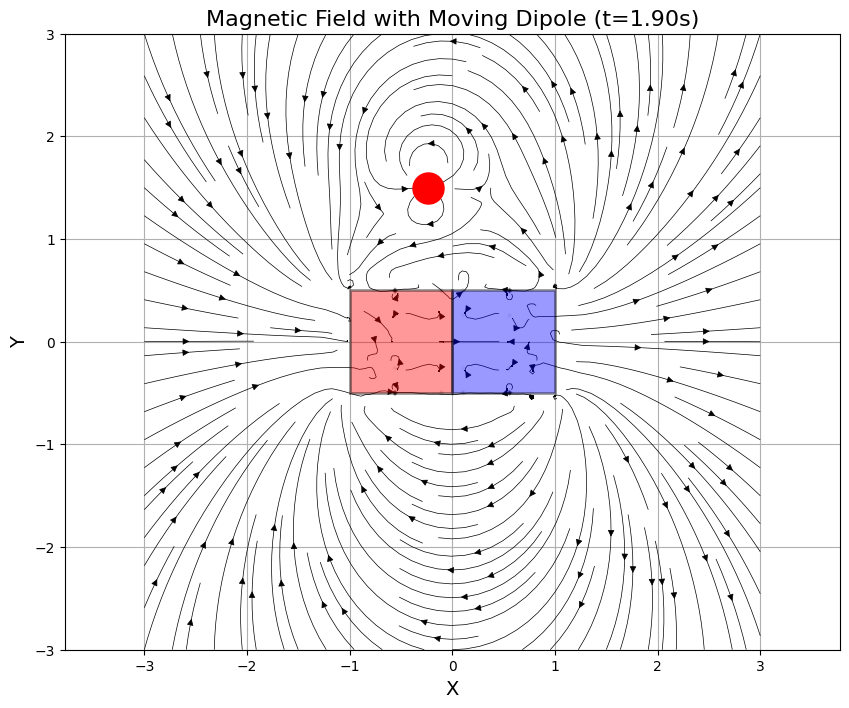

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Constants
MU_0 = 4 * np.pi * 1e-7  # Permeability of free space

def calculate_dipole_field(X, Y, dipole_pos, dipole_moment):
    """
    Calculate the magnetic field at points (X, Y) due to a single dipole.
    """
    x0, y0 = dipole_pos
    mx, my = dipole_moment

    # Calculate position vectors from dipole to each point in the grid
    Rx = X - x0
    Ry = Y - y0
    R = np.sqrt(Rx**2 + Ry**2)
    
    # Avoid division by zero at the location of the dipole
    R[R == 0] = np.inf
    
    # Calculate the magnetic field components
    Bx = MU_0 / (4 * np.pi) * (3 * (mx * Rx + my * Ry) * Rx / R**5 - mx / R**3)
    By = MU_0 / (4 * np.pi) * (3 * (mx * Rx + my * Ry) * Ry / R**5 - my / R**3)
    
    return Bx, By

def calculate_total_field(X, Y, dipole_grid, dipole_moment):
    """
    Calculate the total magnetic field at points (X, Y) due to a grid of dipoles.
    """
    X_dipoles, Y_dipoles = dipole_grid
    Bx_total = np.zeros_like(X)
    By_total = np.zeros_like(Y)
    
    # Sum the contributions of each dipole
    for i in range(X_dipoles.size):
        dipole_pos = (X_dipoles.flat[i], Y_dipoles.flat[i])
        Bx, By = calculate_dipole_field(X, Y, dipole_pos, dipole_moment)
        Bx_total += Bx
        By_total += By
    
    return Bx_total, By_total

def update_dipole_position(t, v, y0):
    """
    Update the position of the moving dipole based on time t.
    """
    x0 = -1
    x_pos = x0+v * t
    y_pos = y0
    return x_pos, y_pos

def create_animation(X, Y, X_dipoles, Y_dipoles, Bx_static, By_static, v_dipole, dipole_moment, dt, total_time):
    """
    Create an animation of the magnetic field with a moving dipole over the bar magnet.
    """
    fig, ax = plt.subplots(figsize=(10, 8))

    def update(frame):
        t = frame * dt
        dipole_pos = update_dipole_position(t, v_dipole, dipole_initial_y)
        Bx_dynamic, By_dynamic = calculate_dipole_field(X, Y, dipole_pos, dipole_moment)

        # Total field is the sum of static and dynamic fields
        Bx_total = Bx_static + Bx_dynamic
        By_total = By_static + By_dynamic

        # Clear the current plot
        ax.clear()

        # Plot the combined magnetic field
        contourf = ax.contourf(X, Y, np.sqrt(Bx_total**2 + By_total**2), cmap='binary', levels=100, extend='both')
        stream = ax.streamplot(X, Y, Bx_total, By_total, color='k', linewidth=0.5, density=1.5)

        # Draw the static bar magnet with color gradient
        rect_red = plt.Rectangle((-length/2, -width/2), length/2, width, linewidth=2, edgecolor='black',
                                 facecolor='red', alpha=0.4, zorder=2)
        rect_blue = plt.Rectangle((0, -width/2), length/2, width, linewidth=2, edgecolor='black',
                                  facecolor='blue', alpha=0.4, zorder=2)
        ax.add_patch(rect_red)
        ax.add_patch(rect_blue)

        # Mark the moving dipole position with a large red circle
        ax.scatter(dipole_pos[0], dipole_pos[1], color='red', s=200, label="Moving Dipole", zorder=3)

        # Redraw the plot to ensure the dot is visible
        plt.draw()

        # Enhancing the plot
        ax.set_title(f"Magnetic Field with Moving Dipole (t={t:.2f}s)", fontsize=16)
        ax.set_xlabel("X", fontsize=14)
        ax.set_ylabel("Y", fontsize=14)
        ax.grid(True)
        ax.axis('equal')
        ax.set_xlim(-3, 3)
        ax.set_ylim(-3, 3)

        return contourf.collections + [stream.lines]


    ani = FuncAnimation(fig, update, frames=int(total_time/dt), blit=True)
    return ani

# Parameters for the bar magnet
length = 2.0  # Length of the bar magnet
width = 1.0   # Width of the bar magnet
dipole_magnitude = 1.0  # Magnitude of each dipole moment
dipole_moment = (dipole_magnitude, 0)  # Dipole moment along the x-axis

# Number of dipoles in the grid (discretization)
num_dipoles_length = 10
num_dipoles_width = 5

# Define the grid for field calculation
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)

# Create a grid of dipoles within the rectangular magnet
x_dipoles = np.linspace(-length/2, length/2, num_dipoles_length)
y_dipoles = np.linspace(-width/2, width/2, num_dipoles_width)
X_dipoles, Y_dipoles = np.meshgrid(x_dipoles, y_dipoles)

# Calculate the static magnetic field from the bar magnet
Bx_static, By_static = calculate_total_field(X, Y, (X_dipoles, Y_dipoles), dipole_moment)

# Parameters for the moving dipole
v_dipole = 0.4  # Velocity of the dipole
dipole_initial_y = 1.5  # Initial y-position of the moving dipole
dipole_moment = (1.0, 0)  # Magnetic moment of the moving dipole

# Time parameters
dt = 0.1  # Time step
total_time = 2.0  # Total simulation time

# Create and display the animation
ani = create_animation(X, Y, X_dipoles, Y_dipoles, Bx_static, By_static, v_dipole, dipole_moment, dt, total_time)
ani.save("magnetic_field_simulation.gif", writer=PillowWriter(fps=24))
plt.show()
